In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
# %matplotlib inline

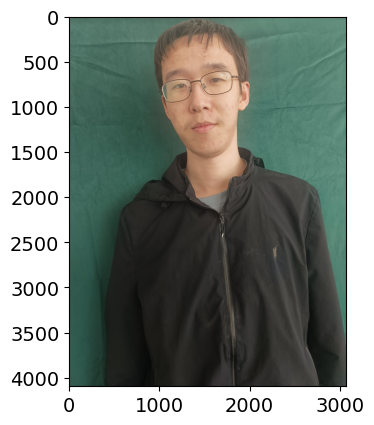

In [74]:
my_photo_raw = imread("my_photo.jpg")
plt.imshow(my_photo_raw)

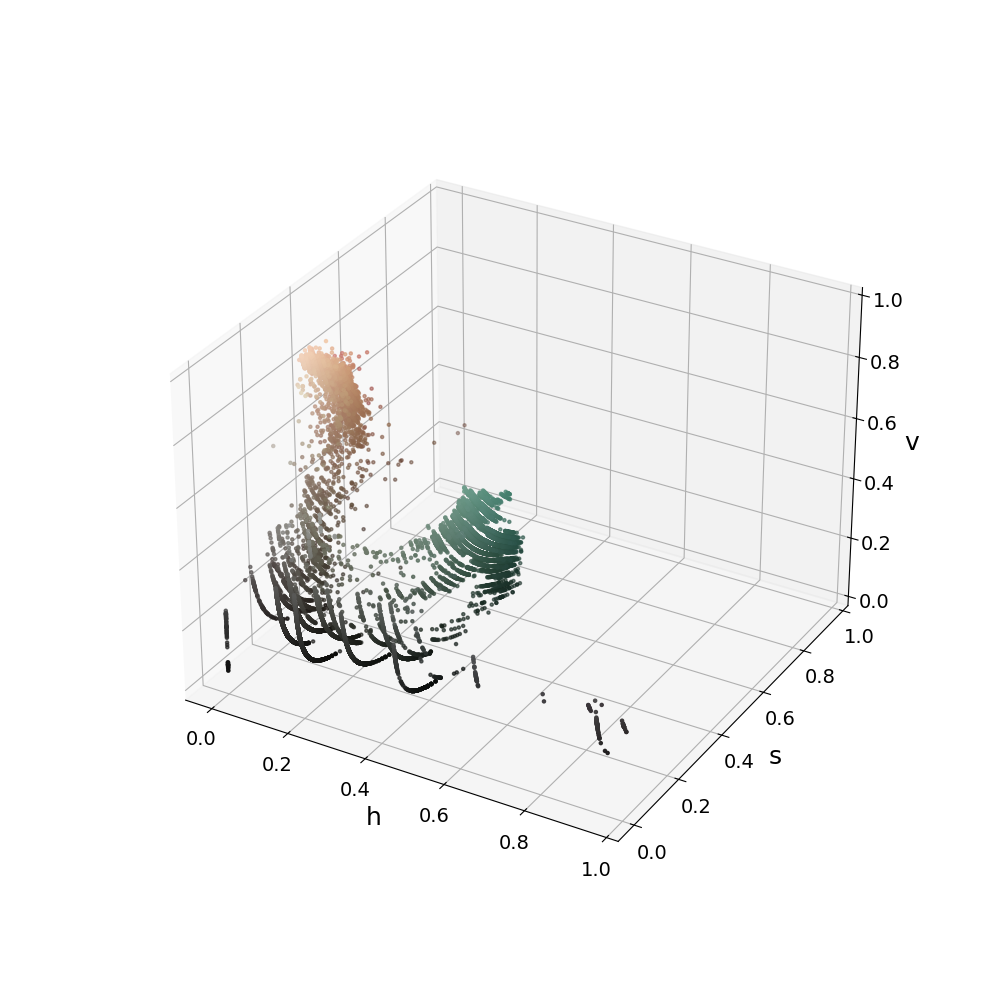

In [75]:
from skimage.color import hsv2rgb, rgb2hsv

myphoto_hsv =  rgb2hsv(my_photo_raw)
h = myphoto_hsv[:,:,0]
s = myphoto_hsv[:,:,1]
v = myphoto_hsv[:,:,2]

# import library for 3D plotting
from mpl_toolkits import mplot3d
from matplotlib import colors
%matplotlib widget

# create list with colors for coloring plot points
img_size = myphoto_hsv.shape[0] * myphoto_hsv.shape[1]
pixel_colors = myphoto_hsv.reshape(img_size, 3)
norm = colors.Normalize()
pixel_colors = norm(pixel_colors).tolist() 

# make an interactive plot
plt.figure('RGB histogram', figsize=(10,10))
ax = plt.axes(projection = '3d')

# plot every 500th pixel (only for performance reasons)
ax.scatter(h.flatten()[::500],s.flatten()[::500],v.flatten()[::500], c=hsv2rgb(pixel_colors[::500]), marker='.')
ax.set_xlabel('h')
ax.set_ylabel('s')
ax.set_zlabel('v')
plt.show()

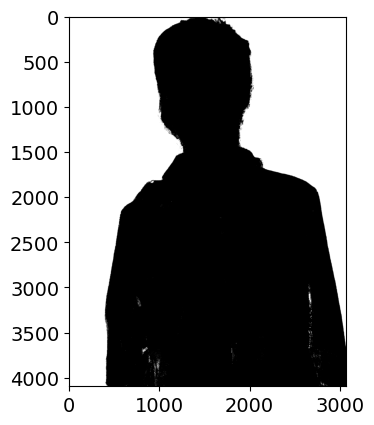

In [71]:
binary_image = (h > 0.15) & (h < 0.5) & (v > 0.0) & (v < 0.65) & (s > 0.22)
binary_image.shape
plt.imshow(binary_image, cmap=plt.cm.gray)

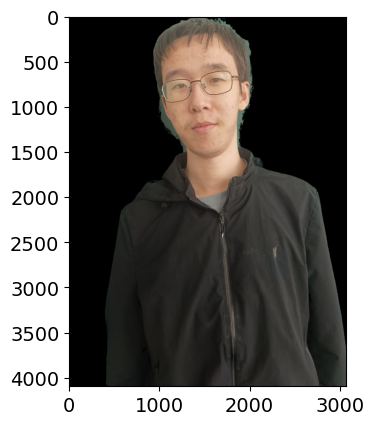

In [72]:
my_photo_raw = imread("my_photo.jpg")
my_photo_raw[binary_image] = 0
plt.imshow(my_photo_raw)